In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drag_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_mouse_data_df = pd.merge(clinical_trial_df, mouse_drag_df, on="Mouse ID")

# Display the data table for preview
clinical_mouse_data_df.info()
clinical_mouse_data_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1906 non-null   object 
 1   Timepoint           1906 non-null   int64  
 2   Tumor Volume (mm3)  1906 non-null   float64
 3   Metastatic Sites    1906 non-null   int64  
 4   Drug                1906 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [5]:
clinical_mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame & Preview DataFrame
result_mu_tumor_by_drugtime_df = clinical_mouse_data_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']].copy().sort_values(["Drug", "Timepoint"])
#result_mu_tumor_by_drugtime_df.info()
#result_mu_tumor_by_drugtime_df.head()

mu_tumor_by_drugtime_data_df = result_mu_tumor_by_drugtime_df.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].mean().to_frame().reset_index()
mu_tumor_by_drugtime_data_df.info()
mu_tumor_by_drugtime_data_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Drug                100 non-null    object 
 1   Timepoint           100 non-null    int64  
 2   Tumor Volume (mm3)  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame / Preview DataFrame
mu_drugtime_data_std_df = result_mu_tumor_by_drugtime_df.groupby(['Drug' ,'Timepoint'])['Tumor Volume (mm3)'].sem().to_frame().reset_index()
mu_drugtime_data_std_df.info()
mu_drugtime_data_std_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Drug                100 non-null    object 
 1   Timepoint           100 non-null    int64  
 2   Tumor Volume (mm3)  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [8]:
# Minor Data Munging to Re-Format the Data Frames - mu_tumor_by_drugtime_data_df
trans_tumor_drugtime_df = mu_tumor_by_drugtime_data_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
trans_tumor_drugtime_df.info()
trans_tumor_drugtime_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Capomulin  10 non-null     float64
 1   Ceftamin   10 non-null     float64
 2   Infubinol  10 non-null     float64
 3   Ketapril   10 non-null     float64
 4   Naftisol   10 non-null     float64
 5   Placebo    10 non-null     float64
 6   Propriva   10 non-null     float64
 7   Ramicane   10 non-null     float64
 8   Stelasyn   10 non-null     float64
 9   Zoniferol  10 non-null     float64
dtypes: float64(10)
memory usage: 880.0 bytes


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
# Isolate four treatments - data
tumor_drugtime4_df = mu_tumor_by_drugtime_data_df[(mu_tumor_by_drugtime_data_df['Drug'] == 'Capomulin') | (mu_tumor_by_drugtime_data_df['Drug'] == 'Placebo') | (mu_tumor_by_drugtime_data_df['Drug'] == 'Ketapril') | (mu_tumor_by_drugtime_data_df['Drug'] == 'Infubinol')]
tumor_drugtime4_df

trans_tumor_drugtime4_df = tumor_drugtime4_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
trans_tumor_drugtime4_df.info()
trans_tumor_drugtime4_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Capomulin  10 non-null     float64
 1   Infubinol  10 non-null     float64
 2   Ketapril   10 non-null     float64
 3   Placebo    10 non-null     float64
dtypes: float64(4)
memory usage: 400.0 bytes


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [11]:
# Isolate four treatments - error/SEM data
err_tumor_drugtime4_df = mu_drugtime_data_std_df[(mu_drugtime_data_std_df['Drug'] == 'Capomulin') | (mu_drugtime_data_std_df['Drug'] == 'Placebo') | (mu_drugtime_data_std_df['Drug'] == 'Ketapril') | (mu_drugtime_data_std_df['Drug'] == 'Infubinol')]
err_tumor_drugtime4_df

err_trans_tumor_drugtime4_df = err_tumor_drugtime4_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
err_trans_tumor_drugtime4_df.info()
err_trans_tumor_drugtime4_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Capomulin  10 non-null     float64
 1   Infubinol  10 non-null     float64
 2   Ketapril   10 non-null     float64
 3   Placebo    10 non-null     float64
dtypes: float64(4)
memory usage: 400.0 bytes


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


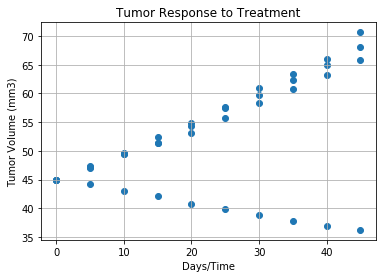

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate the Plot (with Error Bars) - four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
# Add labels

x = tumor_drugtime4_df['Timepoint']
y = tumor_drugtime4_df['Tumor Volume (mm3)']

plt.scatter(x, y, marker='o')
#plotrst illustrate basic pyplot interface, using defaults where possible.
#plt.figure()
#plt.errorbar(x, y, xerr=0.2, yerr=0.4)

plt.title("Tumor Response to Treatment")
plt.xlabel("Days/Time")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()

# Save the Figure
plt.savefig("../Images/tumor_response.png")

# Show the Figure
plt.show()
plt.tight_layout();

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint, Convert to DataFrame
# Preview DataFrame
result_mu_meta_by_drugtime_df = clinical_mouse_data_df[['Drug', 'Timepoint', 'Metastatic Sites']].copy().sort_values(["Drug", "Timepoint"])
result_mu_meta_by_drugtime_df.info()
result_mu_meta_by_drugtime_df.head()

mu_meta_by_drugtime_data_df = result_mu_meta_by_drugtime_df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean().to_frame().reset_index()
mu_meta_by_drugtime_data_df.info()
mu_meta_by_drugtime_data_df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1112
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Drug              1906 non-null   object
 1   Timepoint         1906 non-null   int64 
 2   Metastatic Sites  1906 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 59.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Drug              100 non-null    object 
 1   Timepoint         100 non-null    int64  
 2   Metastatic Sites  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
mu_drugtime_data2_std_df = result_mu_meta_by_drugtime_df.groupby(['Drug' ,'Timepoint'])['Metastatic Sites'].sem().to_frame().reset_index()
mu_drugtime_data2_std_df.info()
mu_drugtime_data2_std_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Drug              100 non-null    object 
 1   Timepoint         100 non-null    int64  
 2   Metastatic Sites  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [15]:
# Minor Data Munging to Re-Format the Data Frames
mu_tumor_drugtime_df = mu_drugtime_data2_std_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
mu_tumor_drugtime_df.info()
mu_tumor_drugtime_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Capomulin  10 non-null     float64
 1   Ceftamin   10 non-null     float64
 2   Infubinol  10 non-null     float64
 3   Ketapril   10 non-null     float64
 4   Naftisol   10 non-null     float64
 5   Placebo    10 non-null     float64
 6   Propriva   10 non-null     float64
 7   Ramicane   10 non-null     float64
 8   Stelasyn   10 non-null     float64
 9   Zoniferol  10 non-null     float64
dtypes: float64(10)
memory usage: 880.0 bytes


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [16]:
mu_tumor_drugtime_df.to_csv('tumor_meta_file.csv')

In [17]:
# Isolate four treatments
mu_tumor_drugtime4_df = mu_tumor_drugtime_df[(mu_tumor_drugtime_df['Drug'] == 'Capomulin') | (mu_tumor_by_drugtime_data_df['Drug'] == 'Placebo') | (mu_tumor_by_drugtime_data_df['Drug'] == 'Ketapril') | (mu_tumor_by_drugtime_data_df['Drug'] == 'Infubinol')]

KeyError: 'Drug'

In [ ]:
mu_tumor_drugtime4_df

In [ ]:
mu_trans_tumor_drugtime4_df = mu_tumor_drugtime4_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mu_trans_tumor_drugtime4_df.info()
mu_trans_tumor_drugtime4_df

In [ ]:
# Generate the Plot (with Error Bars) - four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
# Add labels

plt.title("Metastatic Spread during Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")

plt.grid()

# Save the Figure
plt.savefig("../Images/tumor_meta_sites_response.png")

# Show the Figure
plt.show()
plt.tight_layout();

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)
plt.title("Survival during Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %")

plt.grid()

# Save the Figure
plt.savefig("../Images/survival_rates.png")

# Show the Figure
plt.show()
plt.tight_layout();

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls

plt.title("Tumor Change - 45 Day Treatment")
plt.xticks("Time (Days)")
plt.ylabel("Tumor Volume Change %")

plt.grid()

# Save the Figure
plt.savefig("../Images/tumor_chg_treatmt.png")

# Show the Figure
plt.show()
plt.tight_layout();

fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

## Observations